# AlexNet for MNIST with Tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout, MaxPool2D, Dense, Conv2D, Flatten, BatchNormalization,GlobalAveragePooling2D
from keras.models import Sequential
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

from skimage.transform import resize
import cv2

from tqdm import tqdm

# Preparing the Data

In [2]:
alexnet_img_size = (227,227,3)

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()


In [4]:
no_of_images = 2000

In [5]:
x_train = x_train[:no_of_images]
y_train = y_train[:no_of_images]
x_test = x_test[:int(no_of_images/2)]
y_test = y_test[:int(no_of_images/2)]

In [6]:
# For Shape of Dataset
test_shape = np.shape(x_test)
train_shape = np.shape(x_train)

print(f'Shape of Test Data : {test_shape}')
print(f'Shape of Train Data : {train_shape}')

Shape of Test Data : (1000, 28, 28)
Shape of Train Data : (2000, 28, 28)


## Sample Vizualization of Data

Text(0.5, 1.0, 'Digit : 9')

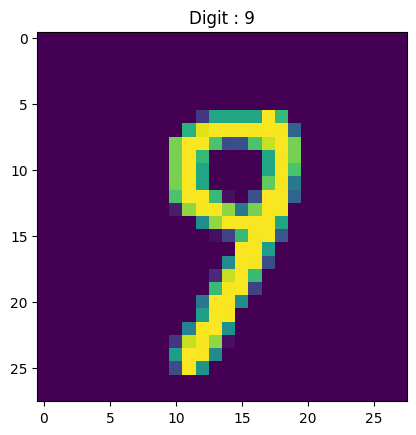

In [7]:
n = np.random.randint(0,train_shape[0]) # Generating Random Number
sample = x_train[n]

plt.imshow(sample)
plt.title('Digit : ' + str(y_train[n]))

# Preprocessing

In [8]:
def resize_images(images,img_size):
    resized_images = []
    
    for i in tqdm(range(len(images))):
        img = cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB)
        resized_images.append(resize(img,(img_size),mode = 'constant'))
    
    return np.array(resized_images,dtype='float32')

In [9]:
print('Loading train data for AlexNet :')
alex_train = resize_images(x_train,alexnet_img_size)

print('Loading test data for AlexNet :')
alex_test = resize_images(x_test,alexnet_img_size)

Loading train data for AlexNet :


100%|██████████| 2000/2000 [00:20<00:00, 97.29it/s] 


Loading test data for AlexNet :


100%|██████████| 1000/1000 [00:10<00:00, 96.56it/s]


In [10]:
alex_train, alex_train_labels = shuffle(alex_train, y_train, random_state=10)

In [11]:
alex_val, alex_val_labels = alex_train[:int(no_of_images/5)], alex_train_labels[:int(no_of_images/5)]

## Vizualizing Resized Images

Text(0.5, 1.0, 'Digit : 2')

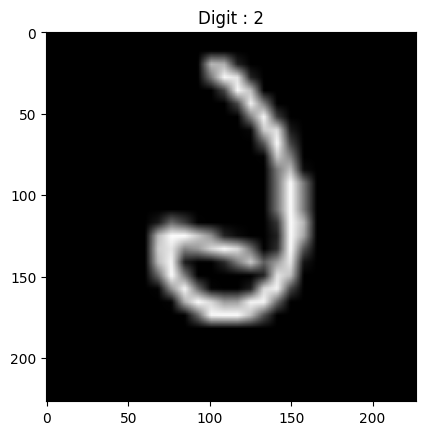

In [12]:
alex_sample = alex_train[n]

plt.figure()
plt.imshow(alex_sample)
plt.title('Digit : ' + str(alex_train_labels[n]))

# Defining the Model

In [13]:
AlexNet = Sequential()

AlexNet.add(Conv2D(filters = 96, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = (alexnet_img_size)))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPool2D(pool_size = (3,3), strides = (2,2)))

AlexNet.add(Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1), activation = 'relu', padding = 'same'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPool2D(pool_size = (3,3), strides = (2,2)))

AlexNet.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
AlexNet.add(BatchNormalization())

AlexNet.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
AlexNet.add(BatchNormalization())

AlexNet.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'))
AlexNet.add(BatchNormalization())
AlexNet.add(MaxPool2D(pool_size = (3,3), strides = (2,2)))

AlexNet.add(Flatten())

AlexNet.add(Dense(units = 4096, activation = 'relu'))
AlexNet.add(Dropout(0.5))

AlexNet.add(Dense(units = 4096, activation = 'relu'))
AlexNet.add(Dropout(0.5))

AlexNet.add(Dense(units = 10, activation = 'softmax'))

early_stopping = EarlyStopping(min_delta = 0.001,patience = 20,restore_best_weights = True,verbose = 0)

In [14]:
# Compile
AlexNet.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

# Train
Alex = AlexNet.fit(alex_train, alex_train_labels, batch_size = 256, epochs = 5,callbacks = [early_stopping],validation_data=(alex_val, alex_val_labels))

AlexNet.summary()

Epoch 1/5
8/8 [==============================] - 77s 9s/step - loss: 44.1773 - accuracy: 0.1220 - val_loss: 217.1237 - val_accuracy: 0.1000
Epoch 2/5
8/8 [==============================] - 73s 9s/step - loss: 2.3788 - accuracy: 0.2955 - val_loss: 259.8351 - val_accuracy: 0.1450
Epoch 3/5
8/8 [==============================] - 82s 11s/step - loss: 1.6281 - accuracy: 0.4115 - val_loss: 152.7588 - val_accuracy: 0.1575
Epoch 4/5
8/8 [==============================] - 74s 9s/step - loss: 1.3051 - accuracy: 0.5330 - val_loss: 75.2286 - val_accuracy: 0.1425
Epoch 5/5
8/8 [==============================] - 80s 10s/step - loss: 1.0988 - accuracy: 0.6185 - val_loss: 29.9163 - val_accuracy: 0.1900
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization

# Vizualizing Predictions

In [15]:
AlexNet_predictions = AlexNet.predict(alex_test)
AlexNet_predictions = np.argmax(AlexNet_predictions,axis=1)

32/32 [==============================] - 8s 256ms/step


Text(0.5, 1.0, 'AlexNet Prediction \n Digit : 2')

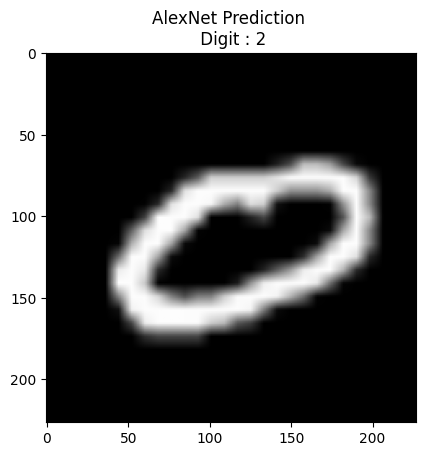

In [16]:
n = np.random.randint(0,test_shape[0]) # Generating Random Number
alex_sample = alex_test[n]

plt.figure()
plt.imshow(alex_sample)
plt.title('AlexNet Prediction \n Digit : ' + str(AlexNet_predictions[n]))

# Evaluting Model

## Confusion Matrix

<Axes: >

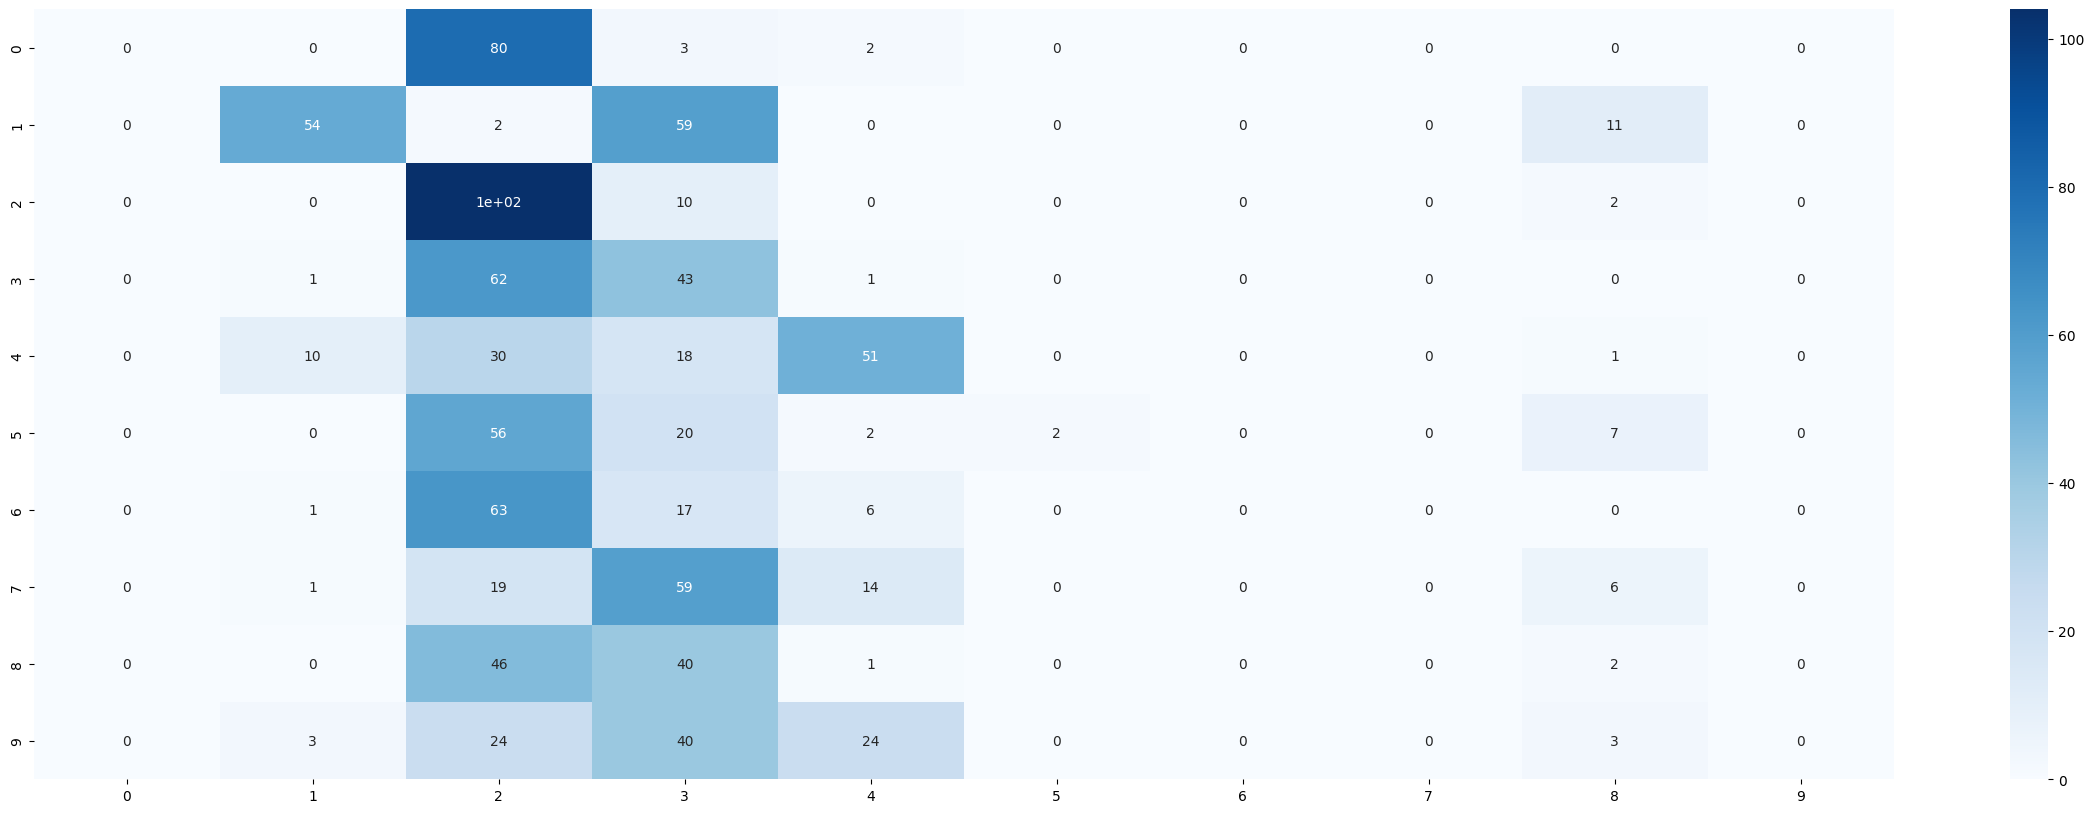

In [17]:
alex_cm = confusion_matrix(y_test, AlexNet_predictions)

class_names = np.unique(y_train)

plt.figure(figsize = (30,10))
sns.heatmap(alex_cm,cmap = 'Blues',annot = True, xticklabels = class_names, yticklabels = class_names)

## Other Metrics

In [18]:
def precision(cm):
    p = {}
    
    for i in range(len(cm)):
        p[i] = cm[i,i] / sum(cm[:,i])
    
    return p

In [19]:
def recall(cm):
    r = {}
    
    for i in range(len(cm)):
        r[i] = cm[i,i]/sum(cm[i,:])
    
    return r

In [20]:
def f1_score(cm):
    f1 = {}
    
    for i in range(len(cm)):
        f1[i] = 2 * (cm[i,i] / sum(cm[:,i])) * (cm[i,i]/sum(cm[i,:])) / ((cm[i,i] / sum(cm[:,i])) + (cm[i,i]/sum(cm[i,:])))
    
    return f1

In [21]:
alex_p = precision(alex_cm)
alex_r = recall(alex_cm)
alex_f1 = f1_score(alex_cm)

C:\Users\sadur\AppData\Local\Temp\ipykernel_9296\671155883.py:5: RuntimeWarning: invalid value encountered in scalar divide
  p[i] = cm[i,i] / sum(cm[:,i])


In [22]:
clf_report = {
    'Alex Precision' : alex_p,
    'Alex Recall' : alex_r,
    'Alex F1 Score' : alex_f1
}

clf_report = pd.DataFrame(clf_report)

In [23]:
clf_report

,Alex Precision,Alex Recall,Alex F1 Score
0,NaN,0.000000,NaN
1,0.771429,0.428571,0.551020
2,0.213992,0.896552,0.345515
3,0.139159,0.401869,0.206731
4,0.504950,0.463636,0.483412
5,1.000000,0.022989,0.044944
6,NaN,0.000000,NaN
7,NaN,0.000000,NaN
8,0.062500,0.022472,0.033058
9,NaN,0.000000,NaN


## Accuracy

Text(0, 0.5, 'Accuracy')

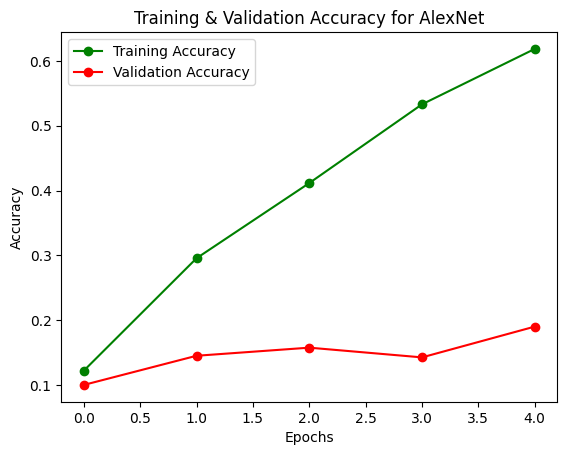

In [24]:
plt.figure()
alex_train_acc = Alex.history['accuracy']
alex_val_acc = Alex.history['val_accuracy']
alex_epoch = [i for i in range(len(alex_val_acc))]
plt.plot(alex_epoch , alex_train_acc , 'go-' , label = 'Training Accuracy')
plt.plot(alex_epoch, alex_val_acc , 'ro-' , label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy for AlexNet')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [25]:
print(metrics.classification_report(y_test, AlexNet_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.77      0.43      0.55       126
           2       0.21      0.90      0.35       116
           3       0.14      0.40      0.21       107
           4       0.50      0.46      0.48       110
           5       1.00      0.02      0.04        87
           6       0.00      0.00      0.00        87
           7       0.00      0.00      0.00        99
           8       0.06      0.02      0.03        89
           9       0.00      0.00      0.00        94

    accuracy                           0.26      1000
   macro avg       0.27      0.22      0.17      1000
weighted avg       0.29      0.26      0.19      1000



C:\Users\sadur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sadur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sadur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471